<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Food_101_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Food 101**

---


Pictures of 101 types of food

**https://www.kaggle.com/datasets/dansbecker/food-101**

In [14]:
import kagglehub, os

path = kagglehub.dataset_download("kmader/food41")
print("Path:", path)
print("Content:", os.listdir(path))

Using Colab cache for faster access to the 'food41' dataset.
Path: /kaggle/input/food41
Content: ['meta', 'food_test_c101_n1000_r64x64x3.h5', 'food_c101_n10099_r32x32x3.h5', 'food_c101_n1000_r384x384x3.h5', 'food_test_c101_n1000_r128x128x3.h5', 'images', 'food_test_c101_n1000_r32x32x3.h5', 'food_test_c101_n1000_r32x32x1.h5', 'food_test_c101_n1000_r128x128x1.h5', 'food_c101_n10099_r64x64x1.h5', 'food_c101_n10099_r64x64x3.h5', 'food_test_c101_n1000_r64x64x1.h5', 'food_c101_n10099_r32x32x1.h5']


In [15]:
import matplotlib.pyplot as plt
import cv2, os, random

img_dir = "/kaggle/input/food41/images"
classes = os.listdir(img_dir)

print("Number of classes:", len(classes))
print("First 10 classes:", classes[:10])

Number of classes: 101
First 10 classes: ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine']


#**`Take a look`**

---


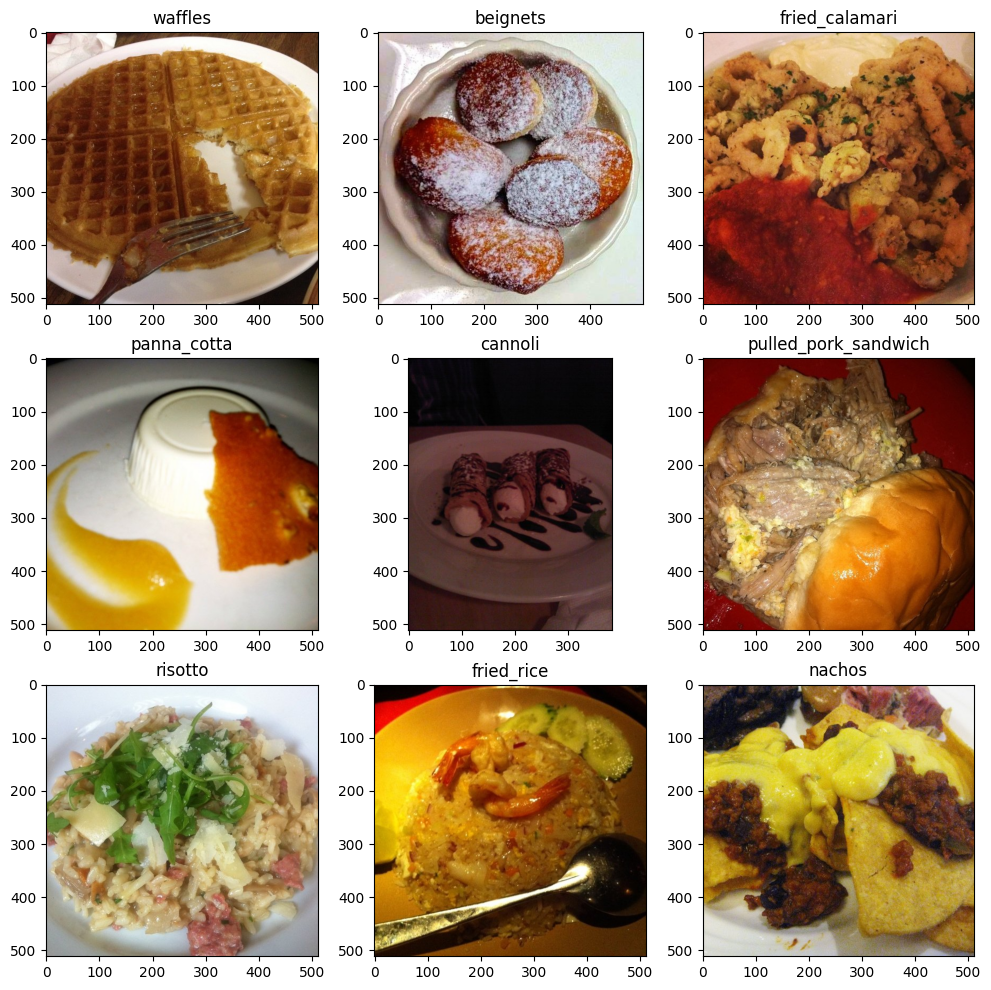

In [20]:
sample_classes = random.sample(classes, 9)

plt.figure(figsize=(12,12))
for i, cls in enumerate(sample_classes):
    cls_path = os.path.join(img_dir, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # img = cv2.resize(img, (128,128))

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(cls)

plt.show()


In [22]:
import matplotlib.pyplot as plt
import cv2, os, random

img_dir = "/kaggle/input/food41/meta"
classes = os.listdir(img_dir)

print("Number of classes:", len(classes))
print("First 10 classes:", classes[:10])

Number of classes: 1
First 10 classes: ['meta']


In [23]:
meta_dir = "/kaggle/input/food41/meta"
print("Inside meta:", os.listdir(meta_dir))

nested_meta = os.path.join(meta_dir, "meta")
if os.path.exists(nested_meta):
    print("Inside nested meta:", os.listdir(nested_meta))

Inside meta: ['meta']
Inside nested meta: ['test.txt', 'train.json', 'labels.txt', 'test.json', 'train.txt', 'classes.txt']


In [24]:
base_dir = "/kaggle/input/food41"
images_dir = os.path.join(base_dir, "images")
meta_dir = os.path.join(base_dir, "meta/meta")

In [25]:
train_txt = os.path.join(meta_dir, "train.txt")
test_txt = os.path.join(meta_dir, "test.txt")
classes_txt = os.path.join(meta_dir, "classes.txt")

In [29]:
with open(classes_txt, "r") as f:
    classes = [line.strip() for line in f]

print("Number of Classes", len(classes))
print("First 5 Classes", classes[:5])

with open(train_txt, "r") as f:
    train_files = [line.strip() for line in f]

with open(test_txt, "r") as f:
    test_files = [line.strip() for line in f]

Number of Classes 101
First 5 Classes ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']


#**`Split the Data`**

---


In [28]:
import shutil
from sklearn.model_selection import train_test_split

train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

def organize(files, split):
    for file in files:
        cls = file.split("/")[0]
        src = os.path.join(images_dir, file + ".jpg")
        dst_dir = os.path.join("data", split, cls)
        os.makedirs(dst_dir, exist_ok=True)
        dst = os.path.join(dst_dir, os.path.basename(src))
        if not os.path.exists(dst):
            shutil.copy(src, dst)

organize(train_files, "train")
organize(val_files, "val")
organize(test_files, "test")

#**`Load the Data`**

---


In [31]:
import tensorflow as tf


size = (128, 128)

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data/train",
    image_size=size,
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data/val",
    image_size=size,
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "data/test",
    image_size=size,
    batch_size=32
)

Found 60600 files belonging to 101 classes.
Found 15150 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


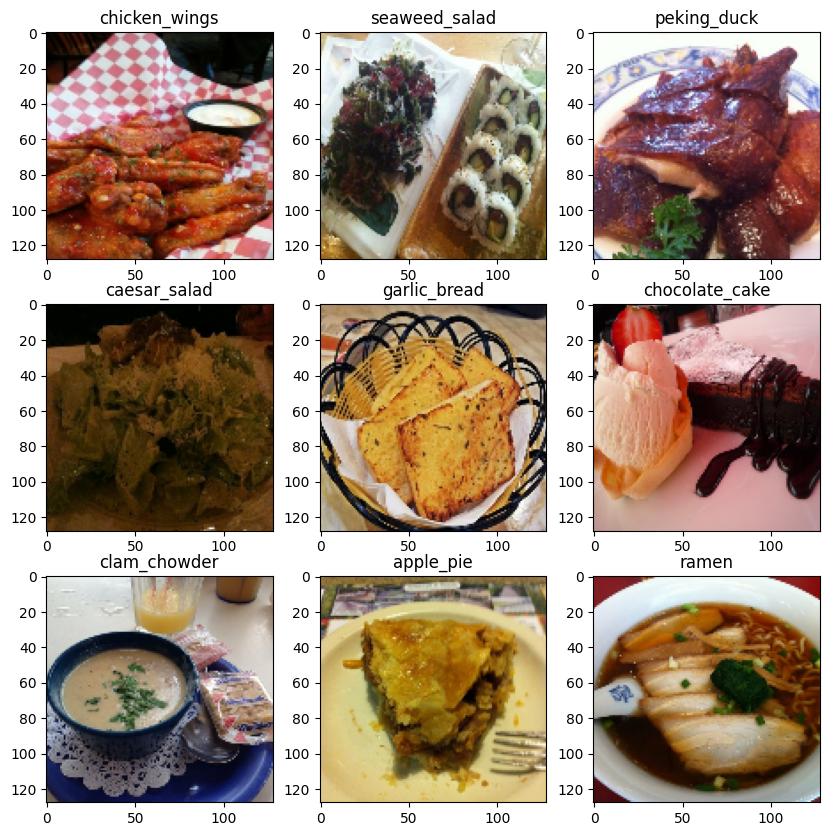

In [33]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

#**`Transfer Learning`**

---
